### Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from  google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# shape of the numpy arrays
print('Shape of X_train: ', X_train.shape)
print('Shape of Y_train: ', Y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of Y_test: ', Y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of Y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of Y_test:  (10000,)


In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


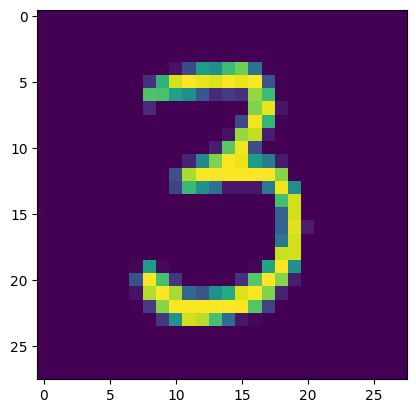

3


In [ ]:
# display image
plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])

In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# All the images have the same dimensions in thisa datasets, if not, we have to resize all the images to a common dimensions

In [ ]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Building the Neural Network

In [ ]:
# CNN - images
# RNN - text,audio

# setting up the layers of the neural network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
])

In [ ]:
# compiling the neural network

model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Training Data

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2970 - accuracy: 0.9153
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1379 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1029 - accuracy: 0.9694
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0833 - accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0699 - accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0610 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0410 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

In [ ]:
# Test data

loss,accuracy = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0965 - accuracy: 0.9751


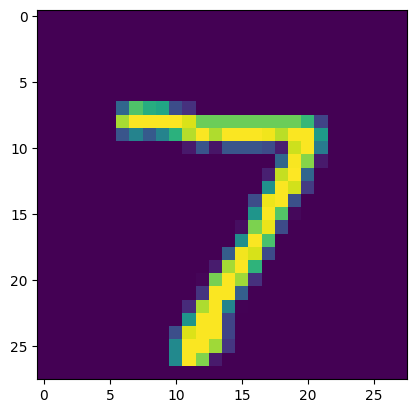

In [ ]:
# first point in x_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(y_pred[0])

[9.02504837e-07 6.78070355e-05 1.04988538e-01 7.81289160e-01
 3.52308089e-05 1.16983254e-04 1.17806210e-13 9.99998152e-01
 3.35946126e-04 2.34741140e-02]


In [ ]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# converting the prediction probabilities to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_test[3])

0


In [ ]:
# Y_test --> True Labels
# Y_pred_labels --> Predicted labels

### Confusion matrix

In [ ]:
confution_matrix = confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(confution_matrix)

tf.Tensor(
[[ 958    0    3    1    1    4    5    4    2    2]
 [   0 1127    1    3    0    0    2    0    2    0]
 [   2    1 1009    4    3    0    2    7    4    0]
 [   1    0    3  985    0    4    0    6    6    5]
 [   1    0    2    1  965    0    4    1    0    8]
 [   2    0    0   10    3  854    6    1    9    7]
 [   4    3    2    1    7    5  930    0    6    0]
 [   0    2    9    1    3    0    0 1006    0    7]
 [   3    1    3    8    5    7    0    3  942    2]
 [   1    2    0    7   15    3    0    4    2  975]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'Truth Labels')

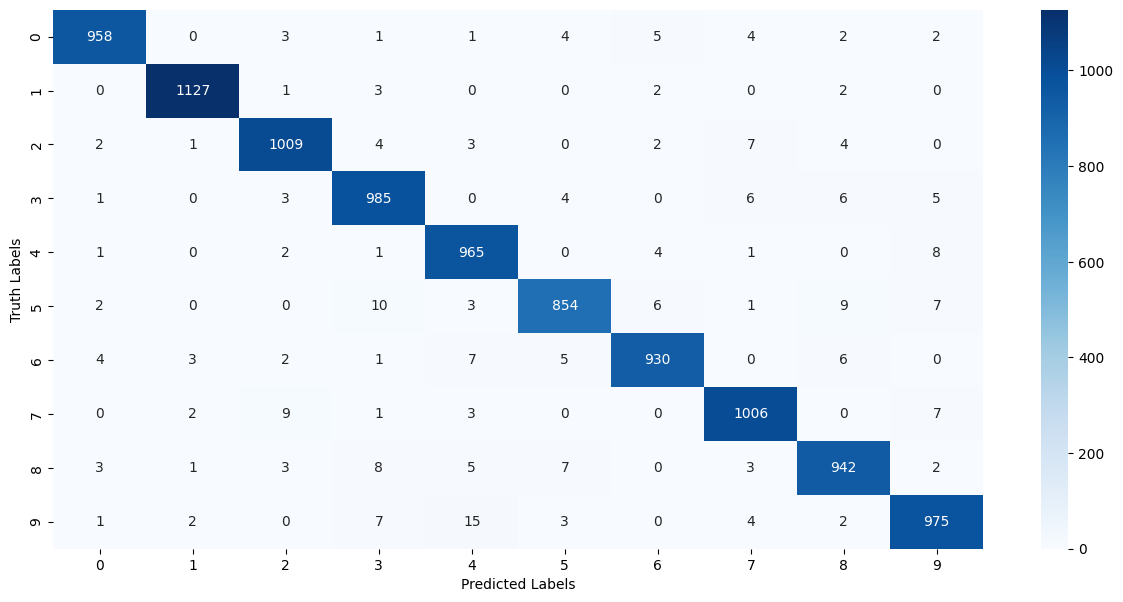

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(confution_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Truth Labels')

## Building Predictive system

In [ ]:
image_path = '/content/images (1).png'
image = cv2.imread(image_path)

In [ ]:
type(image)

numpy.ndarray

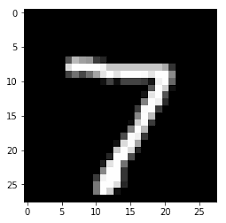

In [ ]:
cv2_imshow(image)

In [ ]:
image.shape

(223, 226, 3)

In [ ]:
grayscale = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(223, 226)

In [ ]:
image_resize = cv2.resize(grayscale,(28,28))

In [ ]:
image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(image_resize)

In [ ]:
image_resize = image_resize/255

In [ ]:
image_reshaped = np.reshape(image_resize,(1,28,28))

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 20ms/step
[[9.8399756e-30 1.7796736e-10 2.0659449e-02 9.9999982e-01 1.8835783e-18
  6.2004960e-14 0.0000000e+00 1.0000000e+00 2.8296205e-29 3.5425845e-05]]


In [ ]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

7


## **Predictive System**

Path of the image to be predicted: /content/images (1).png


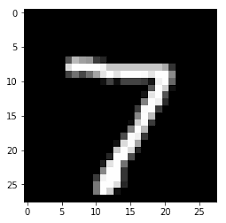

1/1 [==============================] - 0s 24ms/step
The HandWritten Digit is Recognised as  7


In [ ]:
input_image_path = input("Path of the image to be predicted: ")

image = cv2.imread(input_image_path)

cv2_imshow(image)

grayscale = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

image_resize = cv2.resize(grayscale,(28,28))

image_resize = image_resize/255

image_reshaped = np.reshape(image_resize,(1,28,28))

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print("The HandWritten Digit is Recognised as ",input_pred_label)